# Airbnb New User Booking
[Kaggle Description](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings)

In [1]:
# load pkg
import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

# import mod
%autoreload 1
%aimport mod

# save data in one hdf
data = ['train_users_2', 'age_gender_bkts', 'countries', 'sessions', 'test_users', 'sample_submission_NDF']
data_name = ['train', 'age_gender', 'countries', 'sessions', 'test', 'submissions']

def read_data(data, data_name):
    hdf = pd.HDFStore('data.h5')
    for di in range(len(data)):
        fn = data[di]
        dn = data_name[di]
        hdf.put(dn, pd.read_csv('DATA/%s.csv'%fn))

# read_data(data, data_name)
        
# timer
now = datetime.datetime.now()

# read data from hdf
hdf = pd.HDFStore('data.h5')
train = hdf.train
sessions = hdf.sessions
age_gender = hdf.age_gender
countries = hdf.countries

print('data loaded, took %i seconds' %(datetime.datetime.now() - now).seconds)

# transform timestamp columns to datetime
train.date_account_created = pd.to_datetime(train.date_account_created) 
train.timestamp_first_active = pd.to_datetime(train.timestamp_first_active, format = '%Y%m%d%H%M%S')
train.date_first_booking = pd.to_datetime(train.date_first_booking)

# take a look
train.head()

data loaded, took 4 seconds


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## Profiling 

### `date_first_booking`

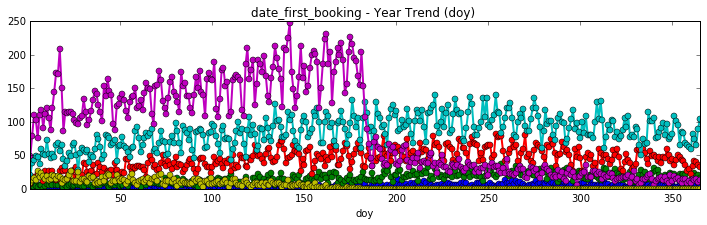

In [10]:
mod.draw_trend(train, 'doy');

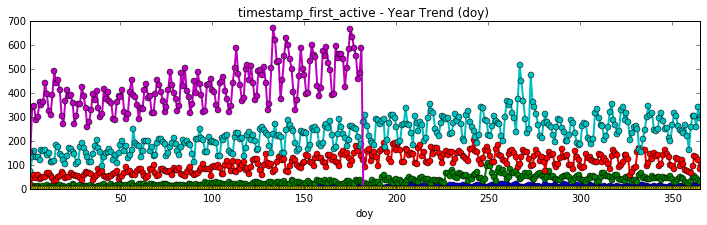

In [11]:
mod.draw_trend(train, 'doy', var = 'timestamp_first_active');

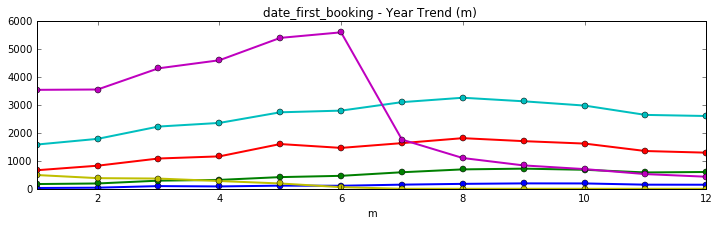

In [12]:
mod.draw_trend(train, 'm')

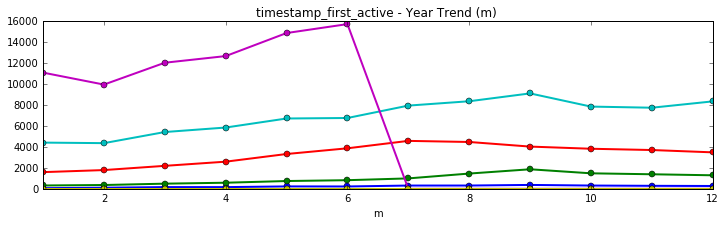

In [13]:
mod.draw_trend(train, 'm', var = 'timestamp_first_active')

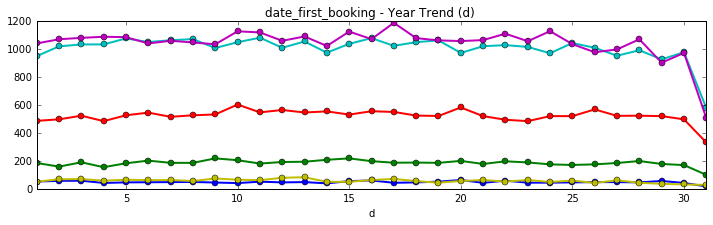

In [14]:
mod.draw_trend(train, 'd');

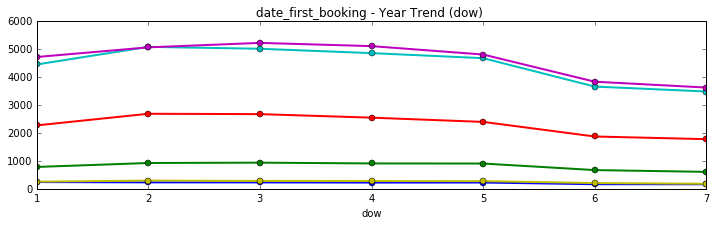

In [15]:
mod.draw_trend(train, 'dow')

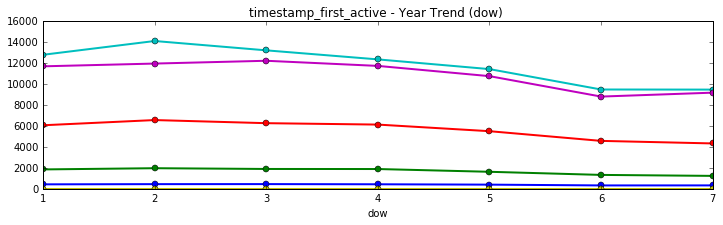

In [16]:
mod.draw_trend(train, 'dow', var = 'timestamp_first_active')

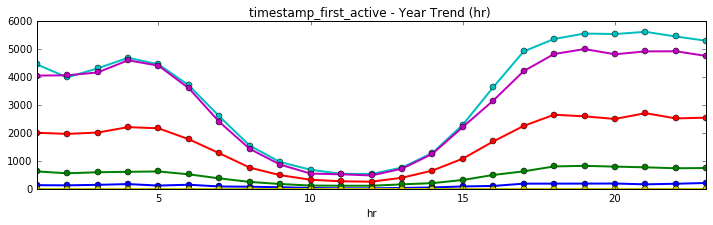

In [17]:
mod.draw_trend(train, 'hr', var = 'timestamp_first_active')

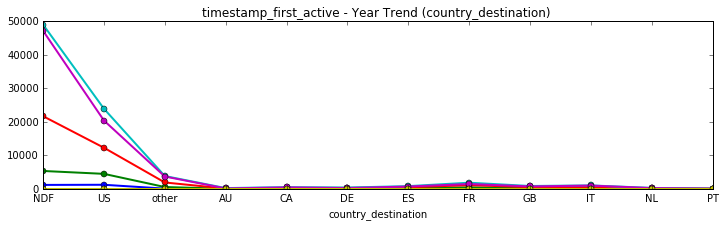

In [20]:
mod.draw_trend(train, 'country_destination', var = 'timestamp_first_active')

## Session -> Attribute

Just flatten the session to be a giant vector